In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=101b5d85b37eebf6e8fe47ae1b23673bbc39b9523c5b066c7a915c4743c0c207
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


Percent Perediction:  75.49


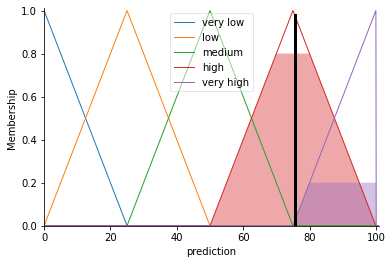

In [ ]:
#EXERCISE 3: Fuzzy model for rainfall events prediction

from skfuzzy import membership
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

value = np.arange(0, 101, 0.1)

#Input variables
temperature = ctrl.Antecedent(value,'temperature')
windspeed = ctrl.Antecedent(value,'windspeed')
rainfall = ctrl.Antecedent(value, 'rainfall')

#Output variable
prediction = ctrl.Consequent(value, 'prediction')

#Membership
def MembershipFunction(field):
  field['very low'] = fuzz.trimf(value, [0, 0, 25])
  field['low'] = fuzz.trimf(value, [0, 25, 50])
  field['medium'] = fuzz.trimf(value, [25, 50, 75])
  field['high'] = fuzz.trimf(value, [50, 75, 100])
  field['very high'] = fuzz.trimf(value, [75, 100, 100])

MembershipFunction(temperature)
MembershipFunction(windspeed)
MembershipFunction(rainfall)
MembershipFunction(prediction)

dict_value = {1: 'very low', 2: 'low', 3: 'medium', 4: 'high', 5:'very high'}

rule = [] # make sure to initialize the rule list
def MakeRule(i):
    f1 = dict_value[val_temperature[i]]
    f2 = dict_value[val_windspeed[i]]
    f3 = dict_value[val_rainfall[i]]
    c = dict_value[prediction_val[i]]
  
    rule.append(ctrl.Rule(temperature[f1] & windspeed[f2] & rainfall[f3], prediction[c]))

val_temperature = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5]
val_windspeed = [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
val_rainfall = [1, 3, 4, 5, 2, 3, 2, 4, 3, 1, 5, 4, 3, 2, 1, 2, 3, 5, 4, 1, 3, 4, 2, 1, 5]
prediction_val = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5]



for i in range(25):
  MakeRule(i)

#Control system
prediction_control = ctrl.ControlSystem(rule)
prediction_simulation = ctrl.ControlSystemSimulation(prediction_control)

#Compute
prediction_simulation.input['temperature'] = 80
prediction_simulation.input['windspeed'] = 80
prediction_simulation.input['rainfall'] = 80

prediction_simulation.compute()
print('Percent Perediction: ',round(prediction_simulation.output['prediction'],2))

#Conclusion
prediction.view(sim=prediction_simulation)
